In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
data = pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
data.size

8000

In [ ]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

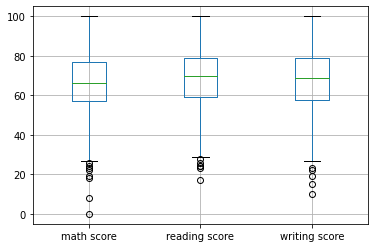

In [ ]:
data.boxplot()

In [ ]:
for col in data:
  print(data[col].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  

EXPLORATORY DATA ANALYSIS(EDA)

EDA is to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

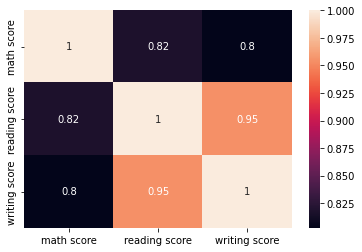

In [ ]:
df_corr = data.corr()
sns.heatmap(df_corr, annot=True)

In [ ]:
data[['gender', 'math score', 'reading score', 'writing score']].groupby(['gender'], as_index=False).mean()

,gender,math score,reading score,writing score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


In [ ]:
data[['race/ethnicity', 'math score', 'reading score', 'writing score']].groupby(['race/ethnicity'], as_index=False).mean()

,race/ethnicity,math score,reading score,writing score
0,group A,61.629213,64.674157,62.674157
1,group B,63.452632,67.352632,65.600000
2,group C,64.463950,69.103448,67.827586
3,group D,67.362595,70.030534,70.145038
4,group E,73.821429,73.028571,71.407143


In [ ]:
data[['parental level of education', 'math score', 'reading score', 'writing score']].groupby(['parental level of education'], as_index=False).mean()

,parental level of education,math score,reading score,writing score
0,associate's degree,67.882883,70.927928,69.896396
1,bachelor's degree,69.389831,73.000000,73.381356
2,high school,62.137755,64.704082,62.448980
3,master's degree,69.745763,75.372881,75.677966
4,some college,67.128319,69.460177,68.840708
5,some high school,63.497207,66.938547,64.888268


In [ ]:
data[['test preparation course', 'math score', 'reading score', 'writing score']].groupby(['test preparation course'], as_index=False).mean()

,test preparation course,math score,reading score,writing score
0,completed,69.695531,73.893855,74.418994
1,none,64.077882,66.534268,64.504673


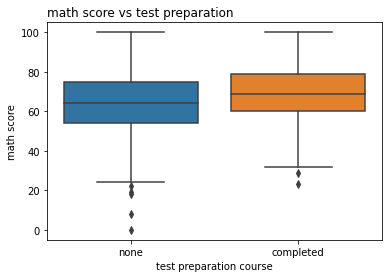

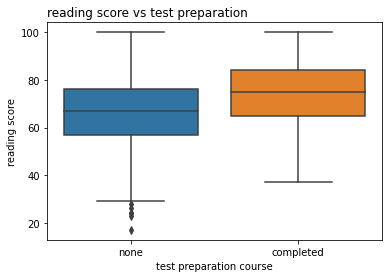

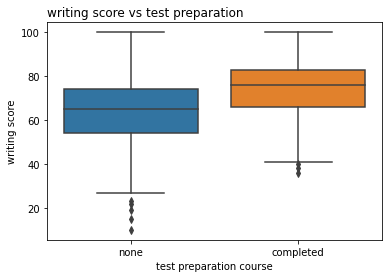

In [ ]:
for item in data.columns[-3:]:
    sns.boxplot(x=data["test preparation course"], y=data[item])
    plt.title(item+" vs test preparation", loc="left")
    plt.show()

The score distribution got narrower if students complete the preparation before the test, and also we can see that the average score is better.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()
train_df = data.copy()
train_df["parental level of education"] = labelencoder.fit_transform(train_df["parental level of education"])
train_df["test preparation course"] = labelencoder.fit_transform(train_df["test preparation course"])
train_df["lunch"] = labelencoder.fit_transform(train_df["lunch"])
train_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1,1,1,72,72,74
1,female,group C,4,1,0,69,90,88
2,female,group B,3,1,1,90,95,93
3,male,group A,0,0,1,47,57,44
4,male,group C,4,1,1,76,78,75


In [ ]:
from sklearn.cluster import KMeans

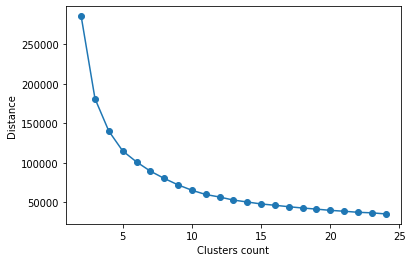

In [ ]:
kmeans_dis = list()
for idx in range(2, 25):  
    kmeans = KMeans(init = "k-means++", n_clusters = idx, n_init = 20)
    kmeans.fit_transform(train_df.iloc[:, 2:])
    kmeans_dis.append(kmeans.inertia_)
plt.plot(list(range(2,25)), kmeans_dis, marker = "o")
plt.xlabel("Clusters count")
plt.ylabel("Distance")
plt.show()

we will plot a graph between k-values and the within-cluster sum of the square to get the k value. we will examine the graph carefully. At some point, our graph will decrease abruptly. That point will be considered as a value of k.

In [ ]:
kmeans = KMeans(init = "k-means++", n_clusters = 8)
kmeans.fit_transform(train_df.iloc[:, 2:])
kmeans_label = kmeans.labels_
data["classification"] = kmeans_label
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,classification
0,female,group B,bachelor's degree,standard,none,72,72,74,7
1,female,group C,some college,standard,completed,69,90,88,7
2,female,group B,master's degree,standard,none,90,95,93,6
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,7
5,female,group B,associate's degree,standard,none,71,83,78,7
6,female,group B,some college,standard,completed,88,95,92,6
7,male,group B,some college,free/reduced,none,40,43,39,3
8,male,group D,high school,free/reduced,completed,64,64,67,5
9,female,group B,high school,free/reduced,none,38,60,50,0


**Performance of each cluster.**

In [ ]:
class_df = data.groupby("classification")[data.columns[-4:-1]].mean()
class_df

,math score,reading score,writing score
classification,,,
0,47.577778,51.459259,49.088889
1,82.117241,81.862069,80.482759
2,73.268116,68.449275,66.826087
3,32.135135,35.972973,33.594595
4,60.383459,57.676692,55.834586
5,57.789809,67.445860,67.605096
6,88.463918,92.793814,92.690722
7,68.189873,77.936709,77.601266


we choose the average of all subjects to rank the clusters

In [ ]:
class_df["total_ave_score"] = (class_df["math score"] + class_df["reading score"] + class_df["writing score"] )/3
rank = class_df["total_ave_score"].sort_values(ascending = False)
rank.index

Int64Index([6, 1, 7, 2, 5, 4, 0, 3], dtype='int64', name='classification')

In [ ]:
rank

classification
6    91.316151
1    81.487356
7    74.575949
2    69.514493
5    64.280255
4    57.964912
0    49.375309
3    33.900901
Name: total_ave_score, dtype: float64

we can find out the correlation between the performance of students and features. Let's plot pie chart to see whether parents education level can affect the performance or not.

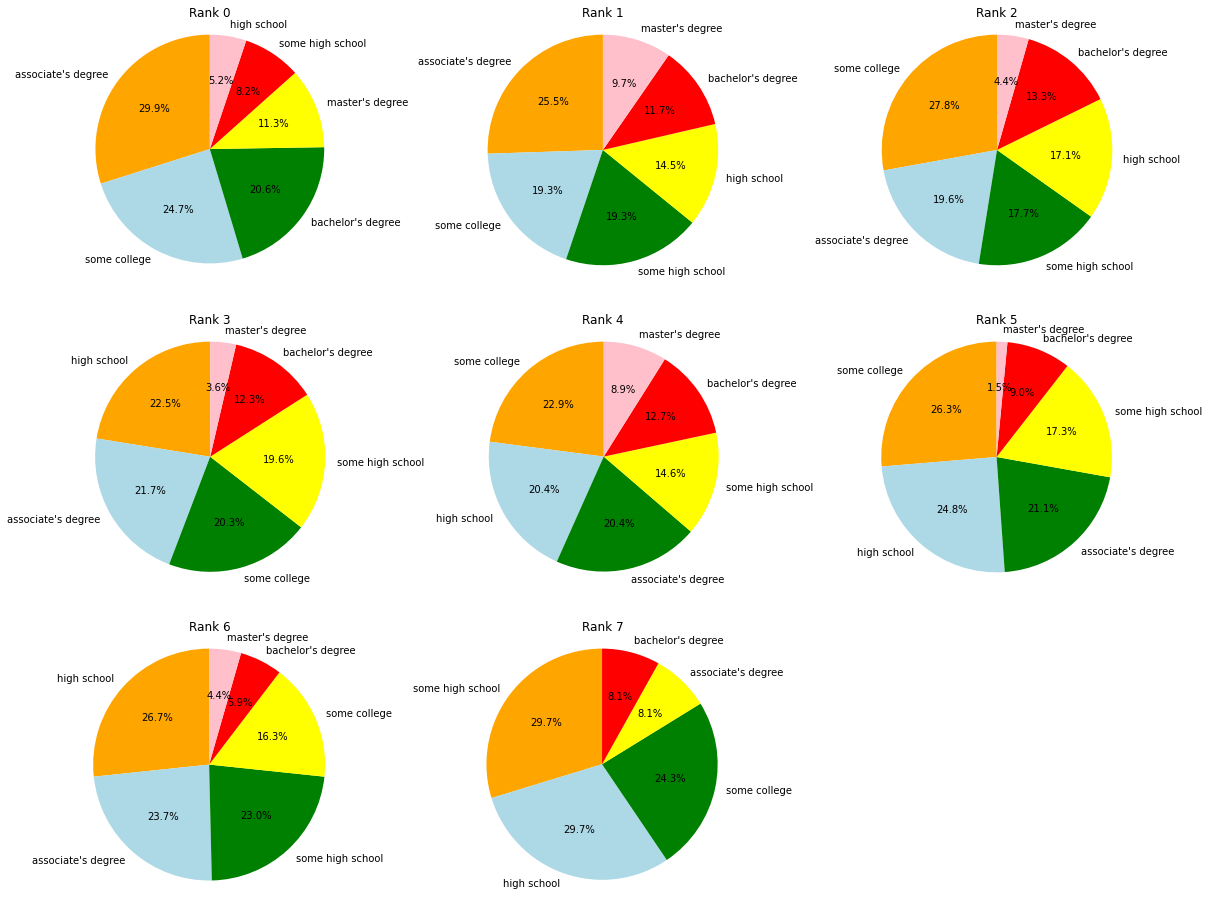

In [ ]:
def plot_pie_chart(column):
    fig, ax = plt.subplots(figsize=(20,16))
    color = ["orange","lightblue","green","yellow","red","pink","brown","gray"]
    for idx in range(8):
        plt.subplot(3, 3, idx+1)
        num = "class"+ str(idx)
        num = data[data["classification"]==rank.index[idx]]
        percentage_of_parent_edu = num[column].value_counts()
        percentage_of_parent_edu.sort_index()
        label = percentage_of_parent_edu.index
        value = percentage_of_parent_edu.values
        plt.pie(value, labels = label, autopct = "%1.1f%%",
                startangle=90, radius = 4, colors = color[:len(label)])
        plt.axis("equal")
        plt.title("Rank "+str(idx))
    plt.show()
plot_pie_chart("parental level of education")

As pie chart were shown above, we can easily understand the ratio of high-degree education. For the rank0, its ratio is around 32%. In addition, there are no differences between rank1 to rank3, and the ratio are around 15~17%. Finally, the ratio is only 8% in rank7.

We calculated the average score of each rank before, so we can say that parent's education affect the score but not obviously, because there are still 70%~80% parents without high education degree.

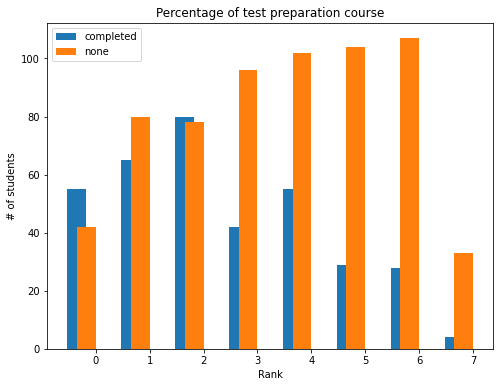

In [ ]:
def plot_bar_chart(column):
    fig, ax = plt.subplots(figsize=(8,6))
    index_dict = dict()
    width = 0.35
    ind = np.arange(8)
    for idx in range(8):
        num = "class"+ str(idx)
        num = data[data["classification"]==rank.index[idx]]
        percentage_of_column = num[column].value_counts()
        percentage_of_column = percentage_of_column.sort_index()
        for key in percentage_of_column.index:
            if key not in index_dict.keys():
                index_dict[key] = []
                index_dict[key].append(percentage_of_column[key]) 
            else:
              index_dict[key].append(percentage_of_column[key]) 
   
    percentage_of_column = data[data["classification"]==rank.index[4]][column].value_counts().sort_index()
    for i in range(len(percentage_of_column.index)):
        rects = ax.bar(ind - width/(i+1), 
                       index_dict[percentage_of_column.index[i]],
                       width, label=percentage_of_column.index[i])

    ax.set_xlabel('Rank')
    ax.set_ylabel('# of students')
    ax.set_title("Percentage of " + column)
    ax.set_xticks(ind)
    ax.legend()
    plt.show()
    
plot_bar_chart("test preparation course") 


50% of students in rank0 completed the test preparation course, and normally there is about 70~80% students in rank7 hadn't finished course. It is say that preparation course can help students get better score.

Conclusion:
1. Parents education level may affect the performance of students. (Pie charts)
2. Writing and Reading are highly correlated. (From Heatmap)
2. Finishing preparation course is benefitial. (Boxplots and k means)
